# This notebook shows euclidean distance comparison

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from sklearn.preprocessing import StandardScaler

# Import library with current code functions
sys.path.append(os.path.join("..", "lib"))
import general_functions as gf, files_paths as fp

In [3]:
def preprocess_data_current_dataset(dataset_path):
    SEQUENCES_NAME_FILE = dataset_path
    SEQUENCES = pd.read_csv(SEQUENCES_NAME_FILE)
    SEQUENCES.drop(columns=['Unnamed: 0'], inplace=True)
    
    SEQUENCES_DT = SEQUENCES.copy()

    # select features
    features = SEQUENCES_DT.columns.to_list()[3:25]
    sample_id = set(SEQUENCES_DT['sample_id'])
    
    grouped_data = []
    for sample_id, group in SEQUENCES_DT.groupby('sample_id'):

        frame_seq = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[:].frame_seq
        sample_id = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[0].sample_id
        video_id = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[0].video_id
        sequence_features = group[features]
        label_measures = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[0].label_measures
        label = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[0].label
        seed_name = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[0].seed_name

        frame_start = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[0].frame_seq
        frame_end = SEQUENCES_DT[SEQUENCES_DT.sample_id == sample_id].iloc[-1].frame_seq

        grouped_data.append((frame_seq, sample_id, video_id, sequence_features, label_measures, label, seed_name, frame_start, frame_end))
    
    return grouped_data

In [4]:
def find_item_with_number(file_list, number):
    number_str = str(number).zfill(10)  # Garante que o número tenha 10 dígitos, preenchendo com zeros à esquerda
    for file_path in file_list:
        if number_str in file_path:
            return file_path
    return None

In [5]:
def show_euclidian_result(grouped_data, number_ocurrency):
    measure_atu = grouped_data[number_ocurrency]
    
    seed_number = measure_atu[6]
    video_id = measure_atu[2]
    seed_path = find_item_with_number(FILE_LIST_SEED, seed_number)
    df_seed = pd.read_csv(seed_path)
    
    df_seed_features = df_seed.iloc[:, 3:27]
    df_measure_features = measure_atu[3]

    colors_seed = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'pink', 'brown', 'gray'] * 2
    colors_measure = ['black', 'yellow', 'purple', 'red', 'green', 'blue', 'cyan', 'magenta', 'orange', 'pink', 'brown', 'gray'] * 2

    filtered_df = df_seed_features[df_seed_features['label_measures'] != '{}']
    x = filtered_df.iloc[:, 0]

    print(f"Emotion: {measure_atu[1]}")
    print(f"Seed file: {seed_path}")
    print(f"Video ID {video_id}")
    print(f"Seed features len: {len(filtered_df)}")
    print(f"Measures features len: {len(df_measure_features)}")

    fig, axs = plt.subplots(len(columns), 1, figsize=(10, len(columns) * 3))

    scaler = StandardScaler()

    for i, col in enumerate(columns):
        y_seed = filtered_df[col].values.reshape(-1, 1)
        y_measure = df_measure_features[col].values.reshape(-1, 1)

        y_seed_scaled = scaler.fit_transform(y_seed)
        y_measure_scaled = scaler.fit_transform(y_measure)

        y_seed_scaled = y_seed_scaled.flatten()
        y_measure_scaled = y_measure_scaled.flatten()

        distance = dtw(y_seed_scaled, y_measure_scaled)
        
        axs[i].plot(x, y_seed_scaled, label=col+'_seed', color=colors_seed[i])
        axs[i].plot(x, y_measure_scaled, label=col+'_measure', color=colors_measure[i])
        axs[i].set_title(f'Plot for {col}. \nDTW: {distance}.')
        axs[i].set_xlabel('Time seconds')
        axs[i].set_ylabel('Valores Medidos')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

In [6]:
sequences_folder = os.path.join("..", "08 - Neural Network", "result_sequences")
datase_seed_ck = os.path.join("..", "Dataset", "REF-Gold-Label")
FILE_LIST_VD_DATA_SEQUENCES = gf.find_files_in_all_subdirectories([sequences_folder], "*.CSV")
FILE_LIST_SEED = gf.find_files_in_all_subdirectories([datase_seed_ck], fp.VD_LABELED_L0)

In [7]:
FILE_LIST_VD_DATA_SEQUENCES

['..\\08 - Neural Network\\result_sequences\\DATASET_SEQUENCES_2.CSV',
 '..\\08 - Neural Network\\result_sequences\\DATASET_SEQUENCES_6.CSV']

## Select witch sequence you want to see the matching series below

In [8]:
current_sequence_file = FILE_LIST_VD_DATA_SEQUENCES[0]
grouped_data = preprocess_data_current_dataset(current_sequence_file)

In [9]:
smile_data = [emotion for emotion in grouped_data if emotion[5] == 'happy']
print(len(smile_data))

1488


## Select what occurrence and witch columns you want to compare of the series

Emotion: 0
Seed file: ..\Dataset\REF-Gold-Label\VD_R_0000000080\VD_LABELED_L0.CSV
Video ID 1
Seed features len: 9
Measures features len: 9


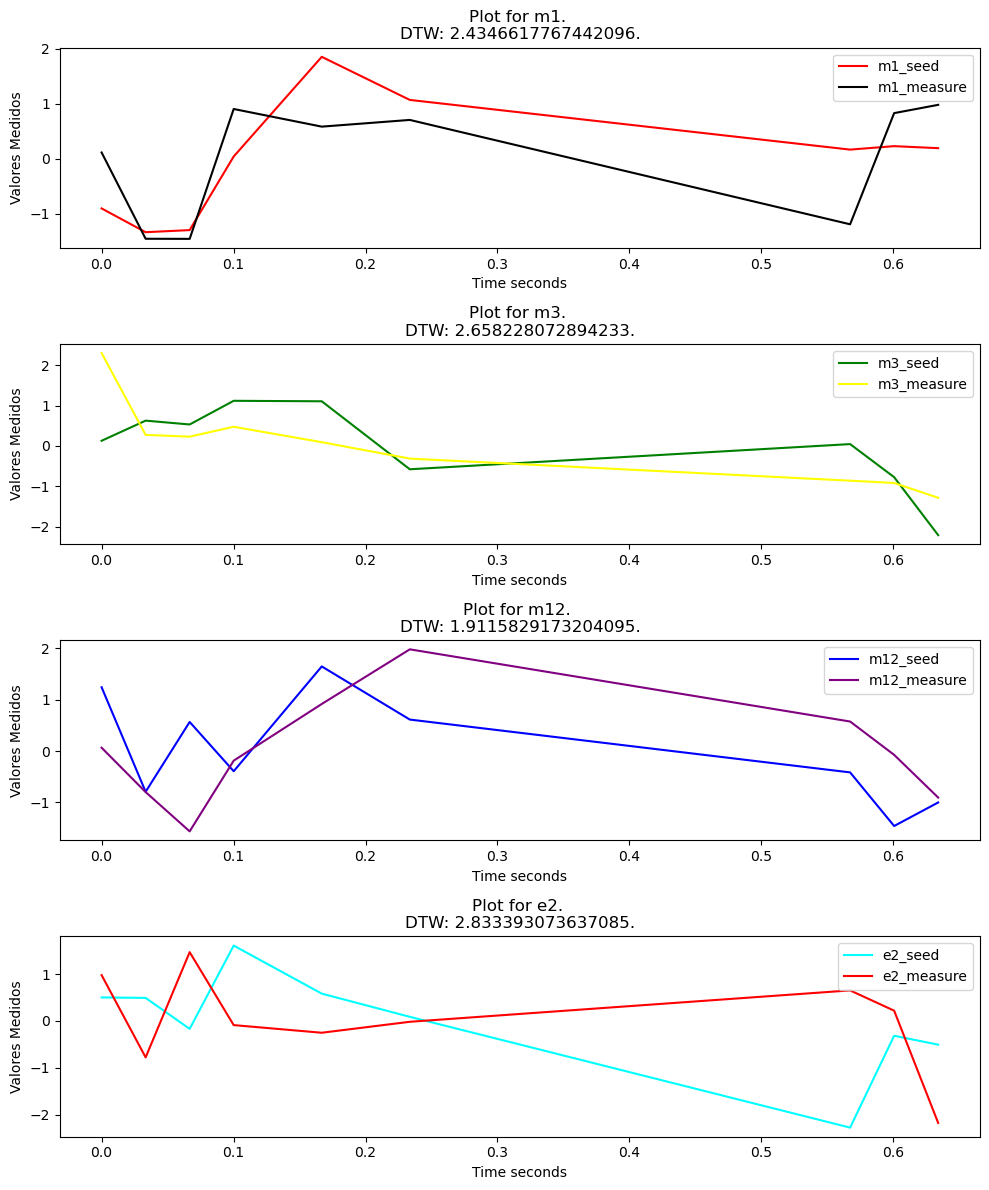

In [10]:
number_occurrence = 0

# Measure, accepted distance
columns = [
    'm1', 
    'm3', 
    'm12', 
    'e2'
]

show_euclidian_result(grouped_data, number_occurrence)